<a href="https://colab.research.google.com/github/Sarath-I/Array-Operations-using-NumPy/blob/main/Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics Project**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('customer_behavior.csv')
df.head()

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07,Fashion,No,A
1,1002,Female,South,NaN,Electronics,Yes,B
2,1003,Female,West,1194.41,Fashion,No,A
3,1004,Female,South,413.06,Grocery,No,A
4,1005,Male,West,1556.32,Fashion,Yes,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           4903 non-null   object 
 2   Region           4825 non-null   object 
 3   PurchaseAmount   4850 non-null   float64
 4   ProductCategory  4474 non-null   object 
 5   Churn            4735 non-null   object 
 6   CampaignGroup    4815 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


## 1. What is the average, median, and mode of PurchaseAmount?

In [ ]:
# 1. What is the average, median, and mode of PurchaseAmount?
print("Mean :", df["PurchaseAmount"].mean())
print("Median :", df["PurchaseAmount"].median())
print("Mode :", df["PurchaseAmount"].mode()[0])

Mean : 1003.9506701030928
Median : 998.0799999999999
Mode : 0.0


In [ ]:
print("Number of missing values in each column:")
df.isna().sum()

Number of missing values in each column:


,0
CustomerID,0
Gender,97
Region,175
PurchaseAmount,150
ProductCategory,526
Churn,265
CampaignGroup,185


In [ ]:
# Handle missing values
df_clean = df.copy()
# Numeric column - median
df_clean['PurchaseAmount'] = df_clean['PurchaseAmount'].fillna(df_clean['PurchaseAmount'].median())
# Categorical columns - mode
categorical_cols = ['Gender', 'Region', 'ProductCategory', 'Churn', 'CampaignGroup']
for col in categorical_cols:
    mode_val = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_val)
df_clean.isna().sum()

,0
CustomerID,0
Gender,0
Region,0
PurchaseAmount,0
ProductCategory,0
Churn,0
CampaignGroup,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           5000 non-null   object 
 2   Region           5000 non-null   object 
 3   PurchaseAmount   5000 non-null   float64
 4   ProductCategory  5000 non-null   object 
 5   Churn            5000 non-null   object 
 6   CampaignGroup    5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [ ]:
purchase = df_clean['PurchaseAmount']
purchase.describe()

,PurchaseAmount
count,5000.000000
mean,1003.774550
std,474.825946
min,0.000000
25%,686.395000
50%,998.080000
75%,1316.155000
max,2688.880000


## 2. Are there any outliers in the PurchaseAmount data?

In [ ]:
# 2. Are there any outliers in the PurchaseAmount data?
Q1 = purchase.quantile(0.25)
Q3 = purchase.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = purchase[(purchase < lower_bound) | (purchase > upper_bound)]
print('Q1 :', Q1)
print('Q3 :', Q3)
print('IQR:', IQR)
print('Lower bound :', lower_bound)
print('Upper bound :', upper_bound)
print('Number of outliers:', outliers.count())

Q1 : 686.395
Q3 : 1316.155
IQR: 629.76
Lower bound : -258.245
Upper bound : 2260.795
Number of outliers: 24


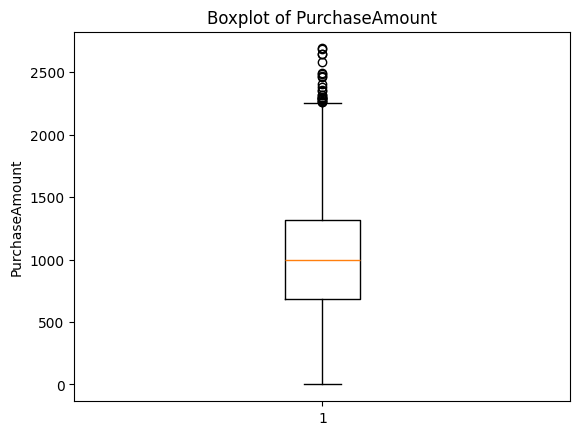

In [ ]:
# Boxplot
plt.figure()
plt.boxplot(purchase)
plt.ylabel('PurchaseAmount')
plt.title('Boxplot of PurchaseAmount')
plt.show()

## 3. Is there any skewness or kurtosis in the PurchaseAmount distribution?

In [ ]:
# 3. Is there any skewness or kurtosis in the PurchaseAmount distribution?
skewness = purchase.skew()
kurtosis = purchase.kurt()
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

Skewness: 0.10883141246252831
Kurtosis: -0.17665360565282562


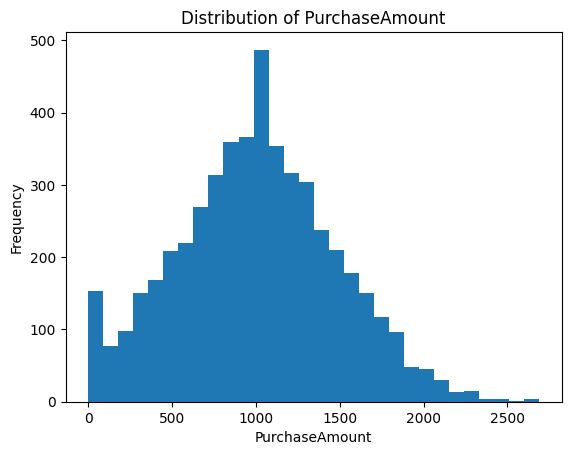

In [ ]:
# Plots of PurchaseAmount distribution
plt.figure()
plt.hist(purchase, bins=30)
plt.xlabel('PurchaseAmount')
plt.ylabel('Frequency')
plt.title('Distribution of PurchaseAmount')
plt.show()

## 4. Is there a significant difference in spending between male and female customers?

In [ ]:
# 4. Is there a significant difference in spending between male and female customers?
male = df_clean[df_clean['Gender'] == 'Male']['PurchaseAmount']
female = df_clean[df_clean['Gender'] == 'Female']['PurchaseAmount']
t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)
print('Male mean   :', male.mean())
print('Female mean :', female.mean())
print('t-statistic :', t_stat)
print('p-value     :', p_value)
if p_value < 0.05:
    print("Significant difference between Male and Female spending.")
else:
    print("No significant difference.")

Male mean   : 1018.6927592954991
Female mean : 988.1851738241309
t-statistic : 2.271227153260738
p-value     : 0.023175721316218083
Significant difference between Male and Female spending.


## 5. Is there a relationship between ProductCategory and customer churn?

In [ ]:
# 5. Is there a relationship between ProductCategory and customer churn?
contingency = pd.crosstab(df_clean['ProductCategory'], df_clean['Churn'])
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency)
print('Contingency table:\n', contingency)
print('\nChi-square statistic:', chi2)
print('Degrees of freedom  :', dof)
print('p-value             :', p_chi2)
if p_chi2 < 0.05:
    print("Significant relationship between ProductCategory and Churn.")
else:
    print("No significant relationship.")

Contingency table:
 Churn              No  Yes
ProductCategory           
Electronics       862  541
Fashion           916  607
Grocery          1279  795

Chi-square statistic: 0.9320029725740938
Degrees of freedom  : 2
p-value             : 0.6275063513920858
No significant relationship.


## 6. Does PurchaseAmount vary significantly across different regions?

In [ ]:
# 6. Does PurchaseAmount vary significantly across different regions? (One-way ANOVA)
groups = [group['PurchaseAmount'].values for name, group in df_clean.groupby('Region')]
f_stat, p_anova = stats.f_oneway(*groups)
print('Mean PurchaseAmount by Region:\n', df_clean.groupby('Region')['PurchaseAmount'].mean())
print('\nF-statistic:', f_stat)
print('p-value    :', p_anova)
if p_anova < 0.05:
    print("PurchaseAmount varies significantly across regions.")
else:
    print("No significant difference across regions.")

Mean PurchaseAmount by Region:
 Region
East     1009.645979
North    1012.475202
South     998.093141
West      995.309447
Name: PurchaseAmount, dtype: float64

F-statistic: 0.38656582634080366
p-value    : 0.762690305503975
No significant difference across regions.


## 7. Which email campaign (A or B) performed better in terms of average PurchaseAmount?

In [ ]:
# 7. Which email campaign (A or B) performed better in terms of average PurchaseAmount?
campaign_means = df_clean.groupby('CampaignGroup')['PurchaseAmount'].mean()
print('Average PurchaseAmount by CampaignGroup:\n', campaign_means)
better = campaign_means.idxmax()
print(f"Campaign {better} performed better on average PurchaseAmount.")

Average PurchaseAmount by CampaignGroup:
 CampaignGroup
A    1012.250984
B     994.435864
Name: PurchaseAmount, dtype: float64
Campaign A performed better on average PurchaseAmount.


## 8. Can we assume PurchaseAmount follows a normal distribution?

In [ ]:
# 8. Can we assume PurchaseAmount follows a normal distribution?
data = df['PurchaseAmount'].dropna()
sample_data = data.sample(min(500, len(data)), random_state=42)
stat, p = stats.shapiro(sample_data)
print(f"Shapiro-Wilk test p-value: {p:.4f}")
if p > 0.05:
    print("Data is approximately normal.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk test p-value: 0.0415
Data is not normally distributed.


## 9. What insights can we gain by applying the Central Limit Theorem?

In [ ]:
# 9. What insights can we gain by applying the Central Limit Theorem?
np.random.seed(42)
sample_means = []
for _ in range(1000):
    sample = purchase.sample(n=50, replace=True)
    sample_means.append(sample.mean())
sample_means = np.array(sample_means)
print('Mean of sample means:', sample_means.mean())
print('Std of sample means :', sample_means.std())
print("According to Central Limit Theorem, even if PurchaseAmount is not normal, the sampling distribution of the mean is approximately normal.")

Mean of sample means: 1005.9364038
Std of sample means : 69.04426558540388
According to Central Limit Theorem, even if PurchaseAmount is not normal, the sampling distribution of the mean is approximately normal.


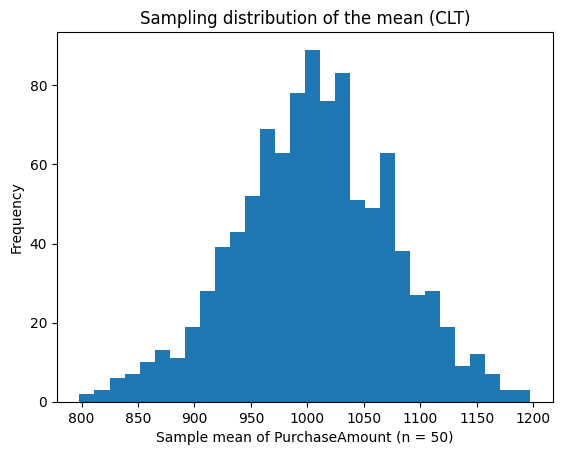

In [ ]:
# Plot: Sampling distribution of the sample mean
plt.figure()
plt.hist(sample_means, bins=30)
plt.xlabel('Sample mean of PurchaseAmount (n = 50)')
plt.ylabel('Frequency')
plt.title('Sampling distribution of the mean (CLT)')
plt.show()

## 10.What is the 95% confidence interval for the average PurchaseAmount?

In [ ]:
# 10.What is the 95% confidence interval for the average PurchaseAmount?
n = purchase.shape[0]
mean_val = purchase.mean()
std_val = purchase.std(ddof=1)
z = 1.96
margin = z * std_val / np.sqrt(n)
lower_ci = mean_val - margin
upper_ci = mean_val + margin
print('Sample size (n)     :', n)
print('Mean PurchaseAmount :', mean_val)
print('Standard deviation  :', std_val)
print('95% CI lower bound  :', lower_ci)
print('95% CI upper bound  :', upper_ci)

Sample size (n)     : 5000
Mean PurchaseAmount : 1003.77455
Standard deviation  : 474.82594570842633
95% CI lower bound  : 990.6130462731252
95% CI upper bound  : 1016.9360537268748
